DATA SCIENCE & BUSINESS ANALYTICS TASKS

Task 2 : Prediction using Unsupervised ML

In [8]:
# loading the dataset - either of method1 or method2

# Method 1
'''
from sklearn.datasets import load_iris
iris_dataset= load_iris()
X = iris_dataset.data
'''

# Method 2
import gdown
import pandas as pd
file_id = '11Iq7YvbWZbt8VXjfm06brx66b10YiwK-'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'iris.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
To: /content/iris.csv
100%|██████████| 5.11k/5.11k [00:00<00:00, 5.20MB/s]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# numerical statistics about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# here, we know that the last column - 'Species' is the label.
X = df.iloc[:,:-1].values

# now, we will standarize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # X_scaled stores the standarized features

# now, we will use the elbow method - calculate WCSS for different number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

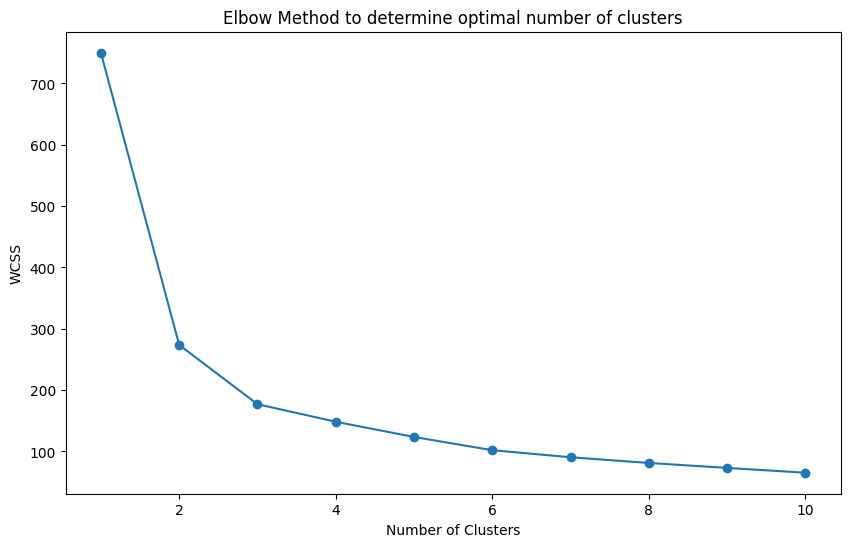

In [12]:
# now, we will plot this elbow graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="o", linestyle="-")
plt.title("Elbow Method to determine optimal number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.570815210603504
For n_clusters = 3 The average silhouette_score is : 0.452949780355554
For n_clusters = 4 The average silhouette_score is : 0.40942326587480654
For n_clusters = 5 The average silhouette_score is : 0.34438306429354765
For n_clusters = 6 The average silhouette_score is : 0.3205348222105012
For n_clusters = 7 The average silhouette_score is : 0.3277537828921023
For n_clusters = 8 The average silhouette_score is : 0.31438789322997235
For n_clusters = 9 The average silhouette_score is : 0.29488303194200977
For n_clusters = 10 The average silhouette_score is : 0.31306453091290387


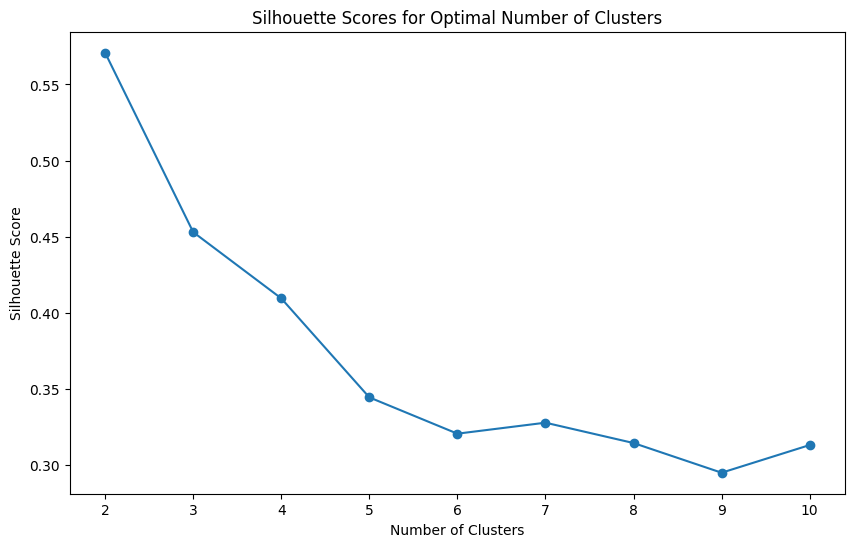

In [13]:
# here, silhouette scores are calculated for different number of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_scaled)
  cluster_labels = kmeans.predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
  silhouette_scores.append(silhouette_avg)

# Plotting these calculated silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores, marker="o", linestyle="-")
plt.title("Silhouette Scores for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()